In [111]:
import warnings

warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 500

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Кластеризация

Наша задача - предсказать есть диабет у индивида или нет. В качестве таргета - колонка Diabetes. В нем три различных значения: `0`, `1`, `2`. `0` означает, что наблюдаемой здоров, `1` значит, что есть риск диабета, `2` означает наличие диабета. В качестве признаков будем использовать пол, количество лет в США, доход семьи и некоторые показатели, измеренные медицинскими работниками.  

**Задание 1.** В этой части ДЗ попробуем использовать кластеризацию как инструмент при проведении моделирования в задаче классификации

In [112]:
df = pd.read_csv('Data/datahw21.csv', index_col='Unnamed: 0')

df.head()

,Gender,Years_in_US,Family_income,ArmCircum,SaggitalAbdominal,GripStrength,Breast_fed,Diabetes
0,1,0.0,0.84,35.3,20.6,55.2,2.0,2.0
1,1,0.0,1.78,34.7,24.4,61.5,2.0,2.0
2,1,0.0,4.51,33.5,25.6,91.0,2.0,2.0
3,1,0.0,2.52,21.0,14.9,32.2,2.0,0.0
4,2,0.0,5.00,25.2,20.7,30.9,2.0,0.0


<Axes: >

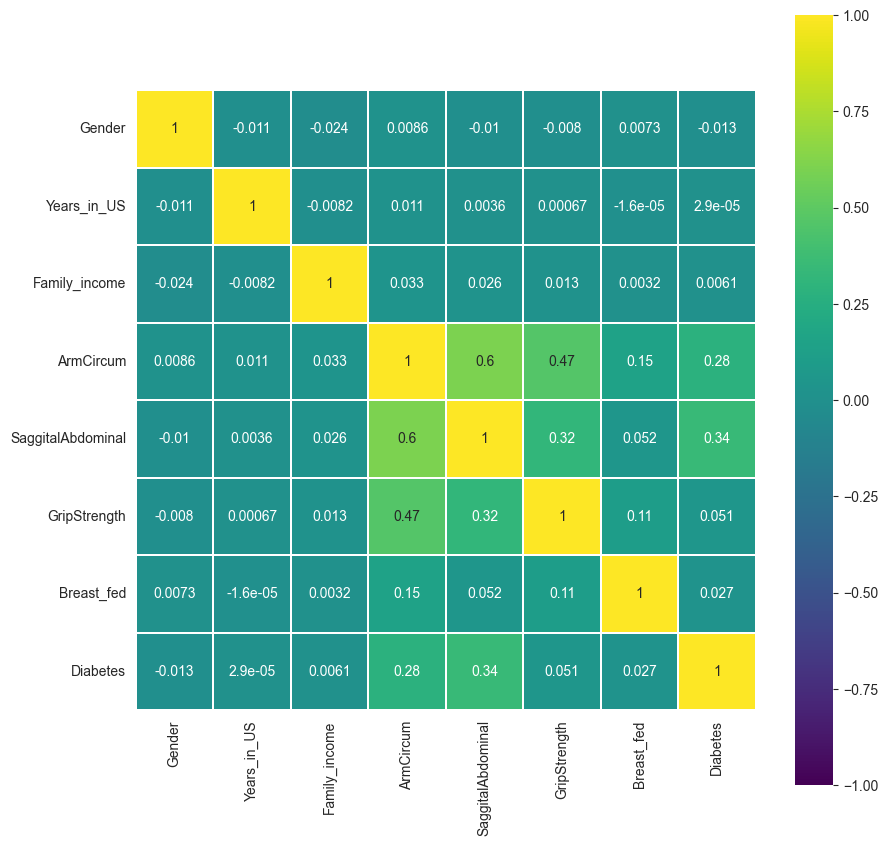

In [113]:
### Посмотрим как устроены данные
### Изобразим корреляционную матрицу

colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), linewidths=0.1, vmin=-1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [114]:
### Разделим выборку на трейн-тест

data = df.drop(['Diabetes'], axis=1)
target = df[['Diabetes']]

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=1)

Для того, чтобы использовать K-means, лучше будет отнормировать данные. 

In [115]:
### Воспользуемся StandardScaler

### Your code is here

ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

Обучим K-Means с параметрами `n_clusters` = 3, `tol` = 0.0005. Выбор параметров обусловлен тем, что у нас три возможных значения таргета. Но в целом основной подход подбора количества кластеров - по кривой зависимости внутрикластерного и межкластерного расстояний от количества кластеров.

Установите `random_state` = 1

In [116]:
### Your code is here
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, tol=0.0005, random_state=1)
kmeans.fit(X_train)

KMeans(n_clusters=3, random_state=1, tol=0.0005)

Посчитаем качество на изначальных данных(нормированных). Для этого обучите с дефолтными параметрами `RandomForestClassifier`, `LogisticRegression`, `LinearSVC`. Там, где нужно, установите `random_state` = 1. (1б)

In [117]:
### Your code is here
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

rfcc = RandomForestClassifier(random_state=1)
rfcc.fit(X_train, y_train)
print('RandomForestClassifier\n', classification_report(y_test, rfcc.predict(X_test), digits=3))

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
print('LogisticRegression\n', classification_report(y_test, lr.predict(X_test), digits=3))

lrs = LinearSVC(random_state=1)
lrs.fit(X_train, y_train)
print('LinearSVC\n', classification_report(y_test, lrs.predict(X_test), digits=3))

RandomForestClassifier
               precision    recall  f1-score   support

         0.0      0.899     0.987     0.941      2189
         1.0      0.182     0.016     0.029       126
         2.0      0.308     0.086     0.135       139

    accuracy                          0.886      2454
   macro avg      0.463     0.363     0.368      2454
weighted avg      0.828     0.886     0.848      2454

LogisticRegression
               precision    recall  f1-score   support

         0.0      0.901     0.989     0.943      2189
         1.0      0.000     0.000     0.000       126
         2.0      0.275     0.101     0.147       139

    accuracy                          0.888      2454
   macro avg      0.392     0.363     0.363      2454
weighted avg      0.819     0.888     0.849      2454

LinearSVC
               precision    recall  f1-score   support

         0.0      0.893     1.000     0.943      2189
         1.0      0.000     0.000     0.000       126
         2.0      0.

Добавьте в признаковое описание номер кластера и посчитайте качество с новым признаком! Стало ли качество хоть сколько-то лучше? (1б)

In [118]:
### Your code is here

X_train = pd.concat([pd.DataFrame(X_train), pd.DataFrame(kmeans.predict(X_train))], axis=1)
X_test = pd.concat([pd.DataFrame(X_test), pd.DataFrame(kmeans.predict(X_test))], axis=1)

rfcc = RandomForestClassifier(random_state=1)
rfcc.fit(X_train, y_train)
print('RandomForestClassifier\n', classification_report(y_test, rfcc.predict(X_test), digits=3))

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)
print('LogisticRegression\n', classification_report(y_test, lr.predict(X_test), digits=3))

lrs = LinearSVC(random_state=1)
lrs.fit(X_train, y_train)
print('LinearSVC\n', classification_report(y_test, lrs.predict(X_test), digits=3))

RandomForestClassifier
               precision    recall  f1-score   support

         0.0      0.899     0.988     0.941      2189
         1.0      0.250     0.024     0.043       126
         2.0      0.361     0.094     0.149       139

    accuracy                          0.888      2454
   macro avg      0.503     0.368     0.378      2454
weighted avg      0.835     0.888     0.850      2454

LogisticRegression
               precision    recall  f1-score   support

         0.0      0.901     0.989     0.943      2189
         1.0      0.000     0.000     0.000       126
         2.0      0.275     0.101     0.147       139

    accuracy                          0.888      2454
   macro avg      0.392     0.363     0.363      2454
weighted avg      0.819     0.888     0.849      2454

LinearSVC
               precision    recall  f1-score   support

         0.0      0.894     1.000     0.944      2189
         1.0      0.000     0.000     0.000       126
         2.0      0.

Посчитаем расстояния от объектов до центров кластеров. Для этого воспользуемся методом `transform` обученного класса kmeans.

Обучим и посчитаем метрики исключительно на расстояниях до центра. Убедимся, что такой подход имеет право на существование, если данные позволяют, то качество не сильно должно пострадать. А в каких-то случаях может оказаться даже лучше! Таким образом можно снижать размерность данных. (2б)

In [119]:
### Your code is here

ss = StandardScaler()
task7_df = ss.fit_transform(df.drop(['Diabetes'], axis=1))

Xk_train, Xk_test, y_train, y_test = train_test_split(kmeans.transform(X=task7_df),
                                                      target,
                                                      test_size=0.25,
                                                      random_state=1)

# Xk_train = ss.fit_transform(Xk_train)
# Xk_test = ss.transform(Xk_test)

rfcc = RandomForestClassifier(random_state=1)
rfcc.fit(Xk_train, y_train)
print('RandomForestClassifier\n', classification_report(y_test, rfcc.predict(Xk_test), digits=3))

lr = LogisticRegression(random_state=1)
lr.fit(Xk_train, y_train)
print('LogisticRegression\n', classification_report(y_test, lr.predict(Xk_test), digits=3))

lrs = LinearSVC(random_state=1)
lrs.fit(Xk_train, y_train)
print('LinearSVC\n', classification_report(y_test, lrs.predict(Xk_test), digits=3))

RandomForestClassifier
               precision    recall  f1-score   support

         0.0      0.897     0.983     0.938      2189
         1.0      0.115     0.024     0.039       126
         2.0      0.310     0.065     0.107       139

    accuracy                          0.881      2454
   macro avg      0.441     0.357     0.361      2454
weighted avg      0.823     0.881     0.845      2454

LogisticRegression
               precision    recall  f1-score   support

         0.0      0.892     1.000     0.943      2189
         1.0      0.000     0.000     0.000       126
         2.0      0.000     0.000     0.000       139

    accuracy                          0.892      2454
   macro avg      0.297     0.333     0.314      2454
weighted avg      0.796     0.892     0.841      2454

LinearSVC
               precision    recall  f1-score   support

         0.0      0.892     1.000     0.943      2189
         1.0      0.000     0.000     0.000       126
         2.0      0.

For n_clusters = 2 The average silhouette_score is : 0.340332077364132
For n_clusters = 3 The average silhouette_score is : 0.4503736793697634
For n_clusters = 4 The average silhouette_score is : 0.33258661097191455
For n_clusters = 5 The average silhouette_score is : 0.3447771366503841
For n_clusters = 6 The average silhouette_score is : 0.384586554065132


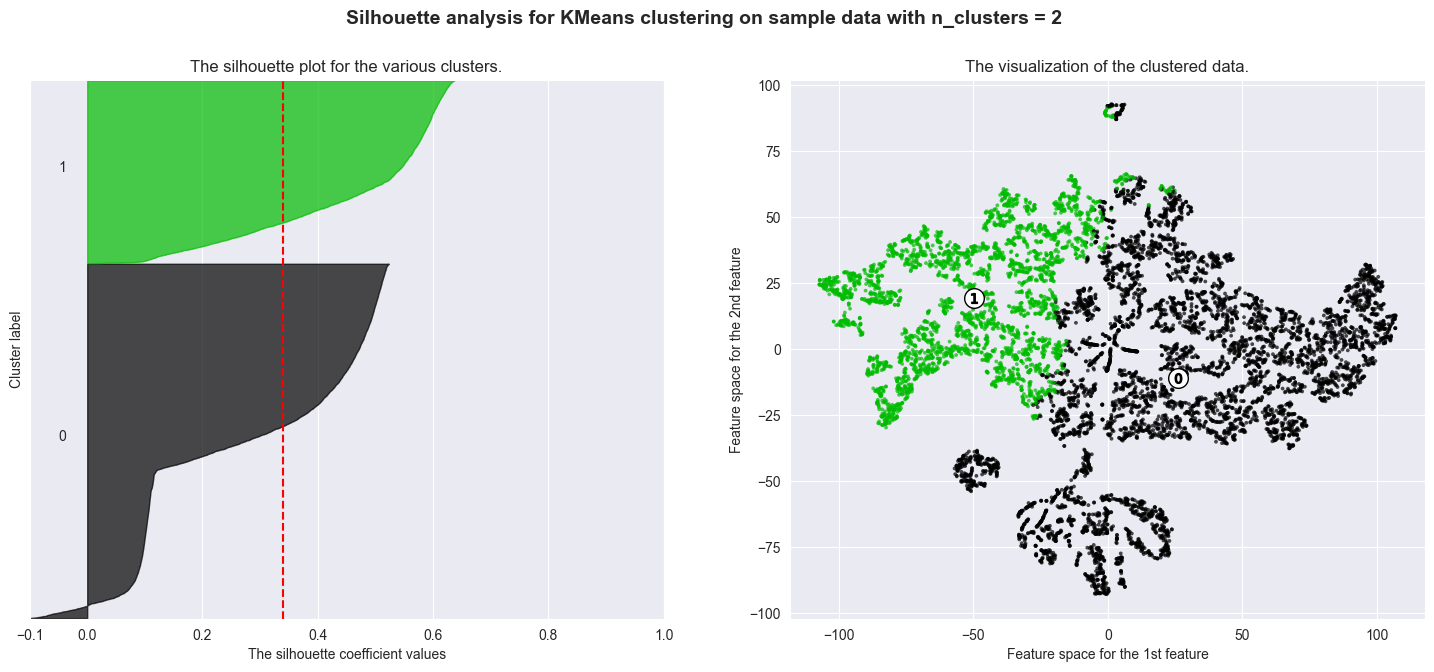

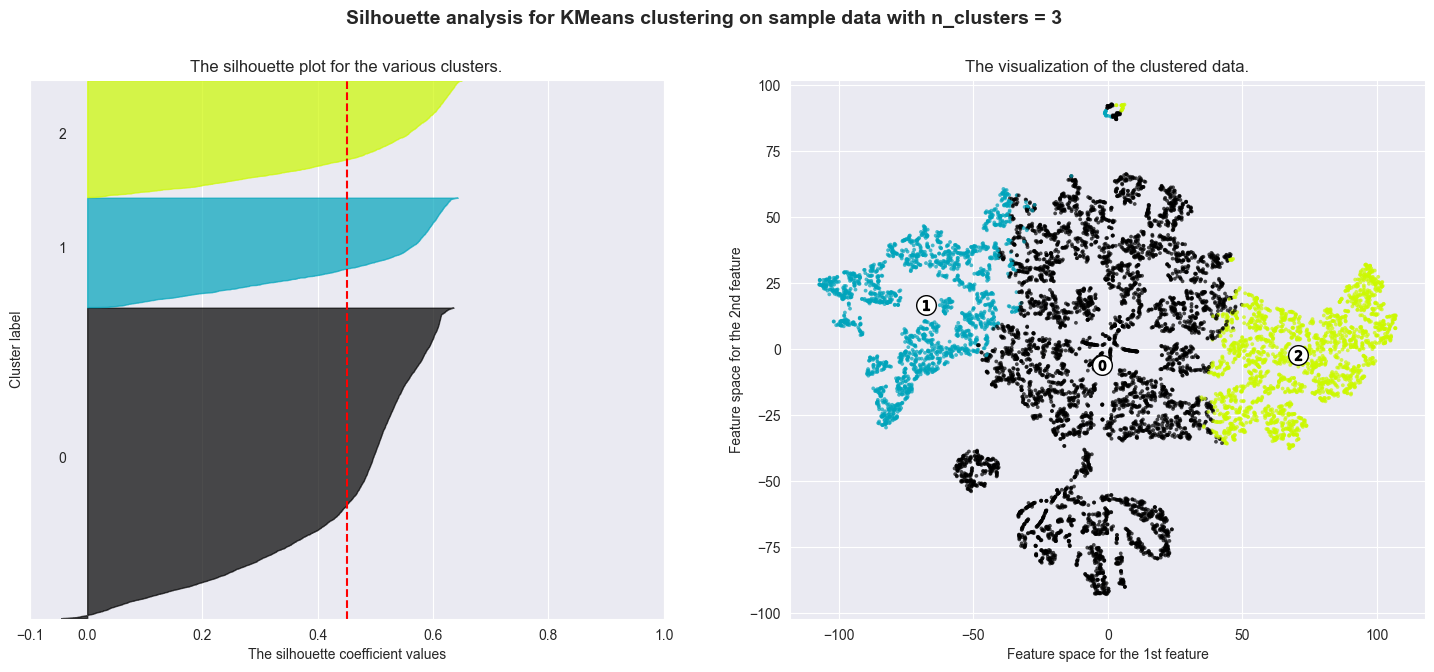

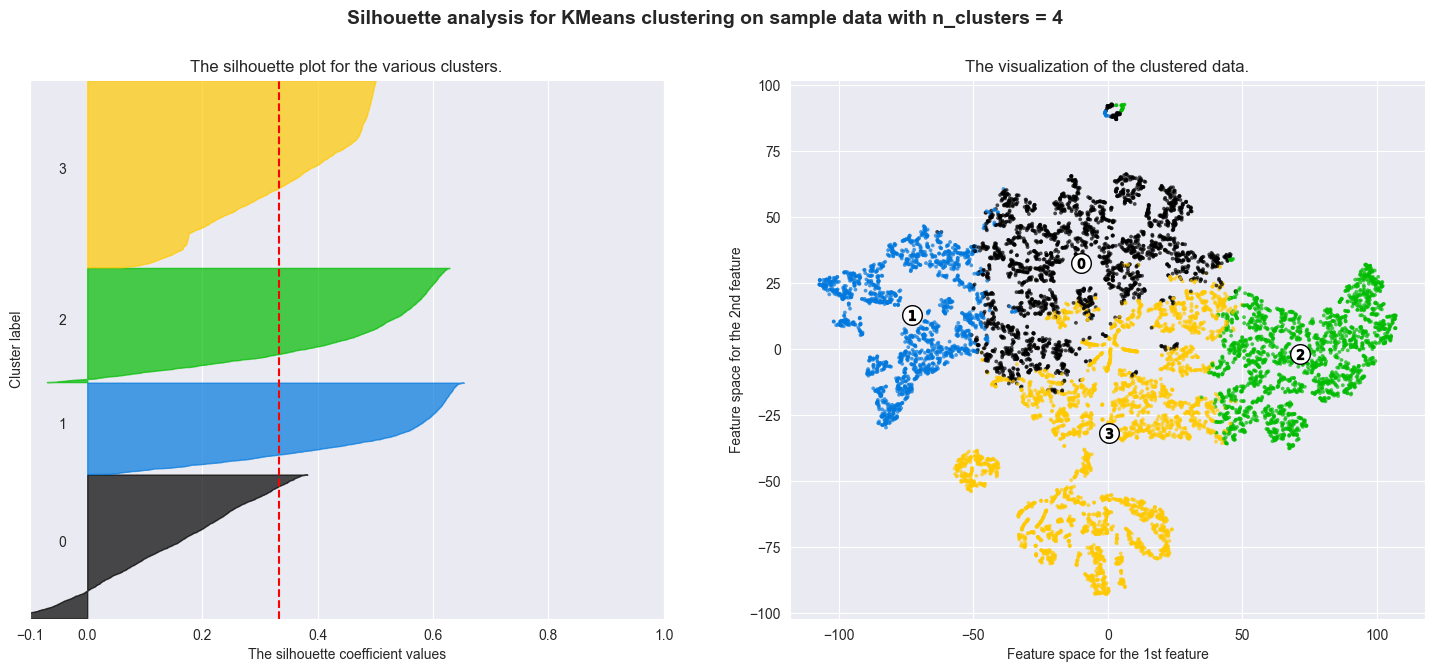

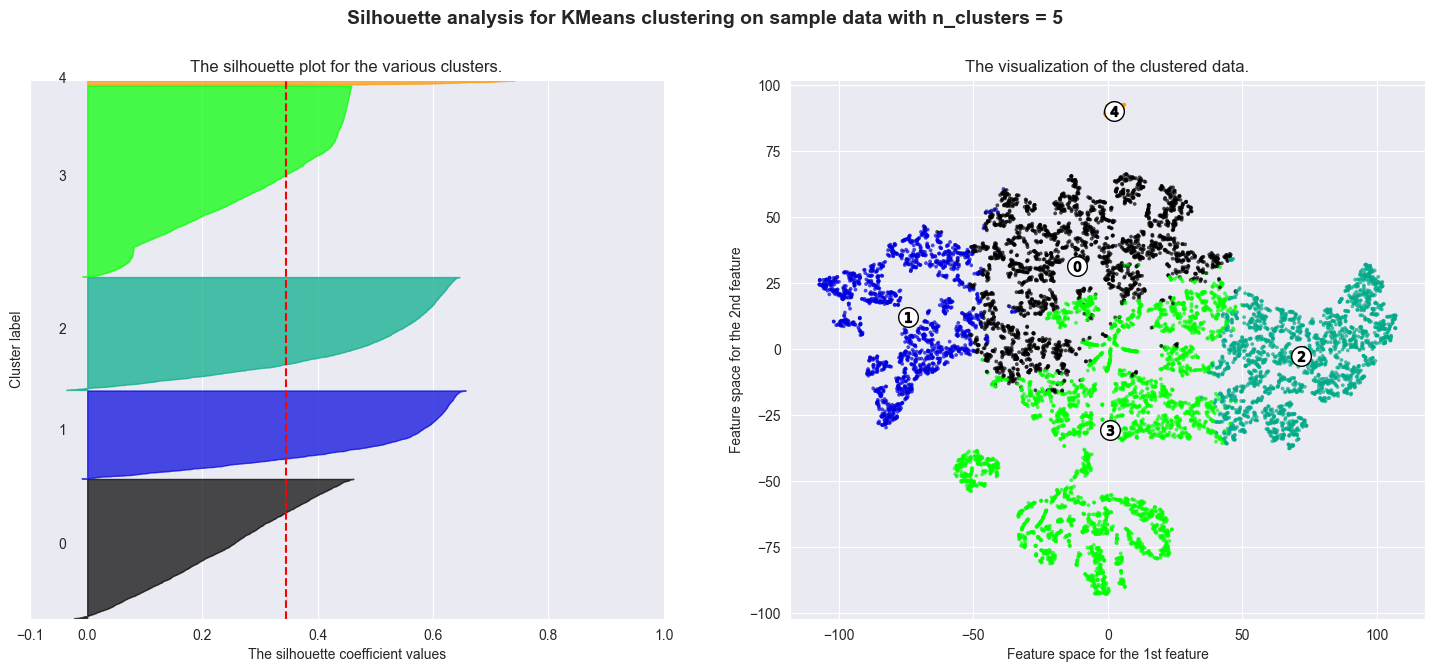

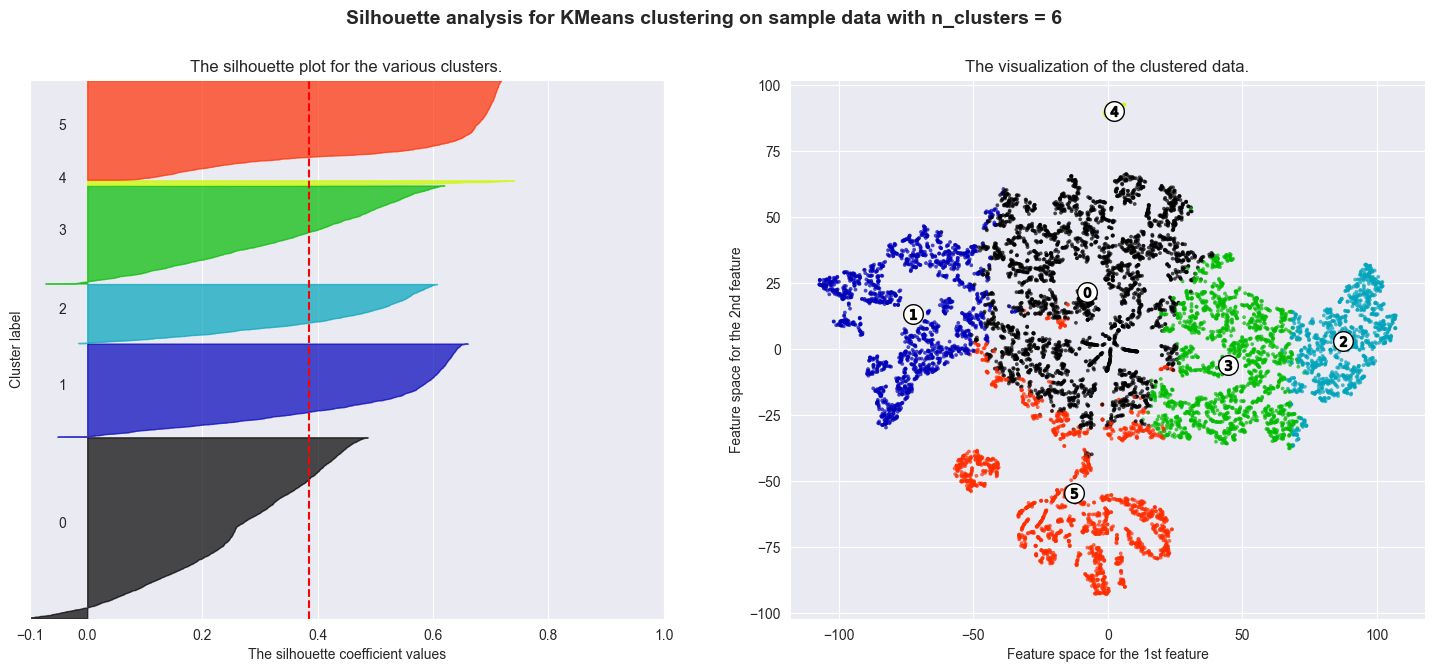

In [121]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
# from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

# X, y = make_blobs(
#     n_samples=500,
#     n_features=2,
#     centers=4,
#     cluster_std=1,
#     center_box=(-10.0, 10.0),
#     shuffle=True,
#     random_state=1,
# )  # For reproducibility

X = data.to_numpy()
y = target.to_numpy()

range_n_clusters = [2, 3, 4, 5, 6]
centers = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

    tsne_X = TSNE().fit_transform(X)
    temp = pd.concat([pd.DataFrame(tsne_X, columns=['x', 'y']),
                      pd.DataFrame(cluster_labels, columns=['target'])], axis=1)
    centers = temp.groupby('target').mean().values

    ax2.scatter(
        tsne_X[:, 0], tsne_X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # ax2.scatter(
    #     X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    # )
    # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # centers = TSNE(2).clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Text(0, 0.5, 'Сумма квадратов расстояний')

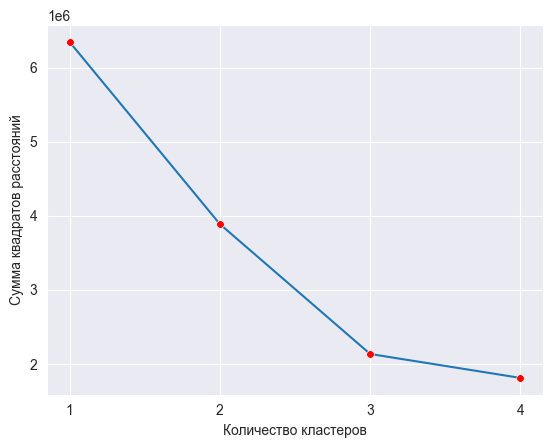

In [122]:
K = range(1, 5)
wss = []

for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans = kmeans.fit(data)
    wss.append(kmeans.inertia_)

sns.lineplot(x=K, y=wss, zorder=1)
sns.scatterplot(x=K, y=wss, color='red', s=30, zorder=2)

plt.xticks(K)
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')